# Predicting presence of Heart Disease

## 1. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Reading data

In [2]:
dataset = pd.read_csv("input/heart.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
dataset["target"].unique()

array([1, 0])

### Checking correlation between columns

In [11]:
dataset.corr()["target"].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

## 3.Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


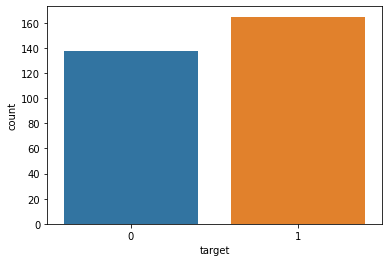

In [12]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

#### Analysing the 'Sex' feature (1: male, 0: female)

In [14]:
dataset["sex"].unique()

array([1, 0])

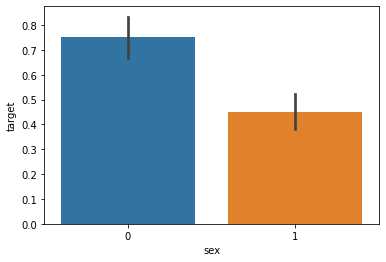

In [15]:
sns.barplot(dataset["sex"],y)

We notice, that females are more likely to have heart problems than males

#### Analysing the 'Chest Pain Type' feature ( chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic )

In [16]:
dataset["cp"].unique()

array([3, 2, 1, 0])

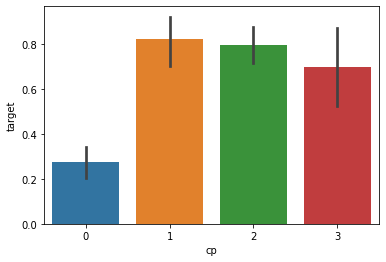

In [17]:
sns.barplot(dataset["cp"],y)

** We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems 

#### Analysing the FBS feature (fasting blood sugar)

In [18]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [19]:
dataset["fbs"].unique()

array([1, 0])

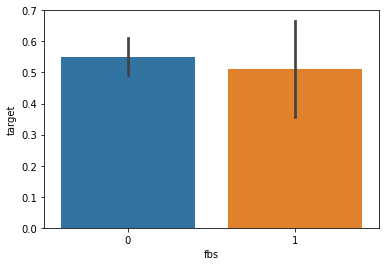

In [20]:
sns.barplot(dataset["fbs"],y)

#### Analysing the restecg feature (resting electrocardiographic results)

In [21]:
dataset["restecg"].unique()

array([0, 1, 2])

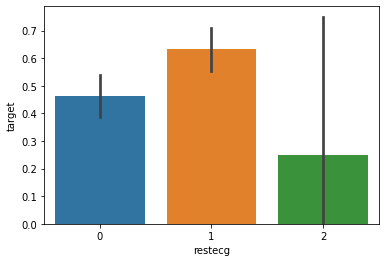

In [22]:
sns.barplot(dataset["restecg"],y)

###### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#### Analysing the 'exang' feature (exercise induced angina)

In [23]:
dataset["exang"].unique()

array([0, 1])

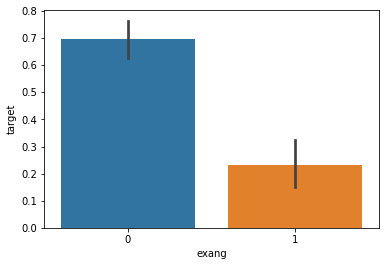

In [24]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems 

#### Analysing the Slope feature (the slope of the peak exercise ST segment)

In [25]:
dataset["slope"].unique()

array([0, 2, 1])

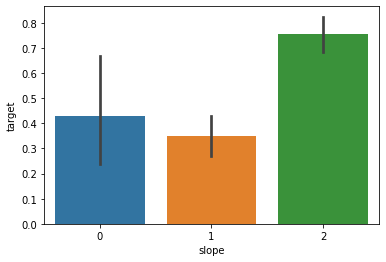

In [26]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

#### Analysing the 'ca' feature (number of major vessels (0-3) colored by flourosopy)

In [27]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

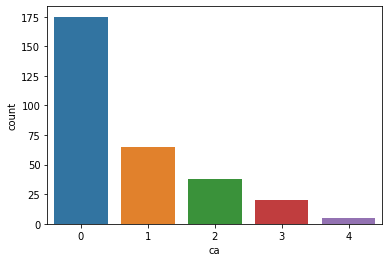

In [28]:
sns.countplot(dataset["ca"])

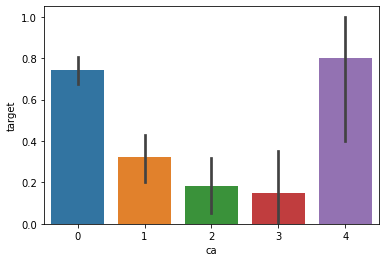

In [29]:
sns.barplot(dataset["ca"],y)

#### Analysing the 'thal' feature

In [30]:
dataset["thal"].unique()

array([1, 2, 3, 0])

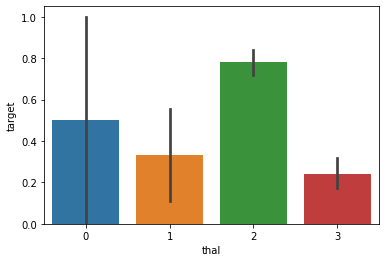

In [31]:
sns.barplot(dataset["thal"],y)

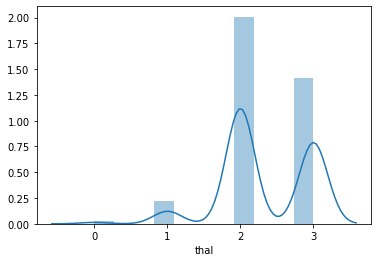

In [32]:
sns.distplot(dataset["thal"])

## 4. Train Test split

In [33]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [34]:
X_train.shape

(242, 13)

In [35]:
X_test.shape

(61, 13)

In [36]:
Y_train.shape

(242,)

In [37]:
Y_test.shape

(61,)

In [38]:
Y_train.unique()

array([1, 0])

## 5. Model Fitting

In [39]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [41]:
Y_pred_lr.shape

(61,)

In [42]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [44]:
Y_pred_nb.shape

(61,)

In [45]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier , export_graphviz

max_accuracy = 0


for x in range(15):
    dt = DecisionTreeClassifier(criterion ="entropy", random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


In [47]:
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [48]:
print(Y_pred_dt.shape)

(61,)


In [49]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")


The accuracy score achieved using Decision Tree is: 75.41 %


In [50]:
import graphviz 
dot_data = export_graphviz(dt ,  feature_names= X_train.columns , class_names=['heart dis..','No heart dis..'] , filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
graph.render(filename='g1.dot')
#graph

'g1.dot.pdf'

### Random Forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
    #print(current_accuracy)
    #print(x)
        
print(max_accuracy)
print(best_x)

88.52
0


In [52]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [53]:
Y_pred_rf.shape

(61,)

In [54]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")


The accuracy score achieved using Decision Tree is: 88.52 %


### K Nearest Neighbours

In [55]:
from sklearn.neighbors import KNeighborsClassifier

max_accuracy = 0

for x in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,Y_train)
    Y_pred_knn = knn.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
    #print(current_accuracy)
    #print(x)
        
print(max_accuracy)
print(best_x)

knn = KNeighborsClassifier(n_neighbors=best_x)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

77.05
39


In [56]:
Y_pred_knn.shape

(61,)

In [57]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 77.05 %


### Support Vector machine

In [58]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [59]:
Y_pred_svm.shape

(61,)

In [60]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")


The accuracy score achieved using Linear SVM is: 81.97 %


### Neural Network

In [61]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

# normalize data
X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

print (X_train.shape, Y_train.shape)
print (X_train.shape, Y_test.shape)
print (dataset.columns)

(242, 13) (242,)
(242, 13) (61,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [62]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [63]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(22, init = 'uniform', activation = 'relu', input_dim = 13))

# Adding the second hidden layer
classifier.add(Dense(11, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(22, activation="relu", input_dim=13, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, activation="relu", kernel_initializer="uniform")`
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [64]:

# fit the model to the training data
history= classifier.fit(X_train,Y_train,epochs=170,validation_data=(X_test, Y_test))



Train on 242 samples, validate on 61 samples
Epoch 1/170
242/242 [==============================] - 0s 893us/step - loss: 0.6929 - acc: 0.5455 - val_loss: 0.6924 - val_acc: 0.5574
Epoch 2/170
242/242 [==============================] - 0s 97us/step - loss: 0.6922 - acc: 0.5413 - val_loss: 0.6914 - val_acc: 0.5574
Epoch 3/170
242/242 [==============================] - 0s 86us/step - loss: 0.6910 - acc: 0.5413 - val_loss: 0.6894 - val_acc: 0.5738
Epoch 4/170
242/242 [==============================] - 0s 96us/step - loss: 0.6887 - acc: 0.6281 - val_loss: 0.6860 - val_acc: 0.7213
Epoch 5/170
242/242 [==============================] - 0s 87us/step - loss: 0.6848 - acc: 0.7686 - val_loss: 0.6800 - val_acc: 0.8197
Epoch 6/170
242/242 [==============================] - 0s 90us/step - loss: 0.6779 - acc: 0.8140 - val_loss: 0.6704 - val_acc: 0.8033
Epoch 7/170
242/242 [==============================] - 0s 93us/step - loss: 0.6671 - acc: 0.8264 - val_loss: 0.6556 - val_acc: 0.8197
Epoch 8/170
242/

242/242 [==============================] - 0s 96us/step - loss: 0.2559 - acc: 0.9050 - val_loss: 0.3463 - val_acc: 0.9016
Epoch 122/170
242/242 [==============================] - 0s 96us/step - loss: 0.2553 - acc: 0.9050 - val_loss: 0.3475 - val_acc: 0.9016
Epoch 123/170
242/242 [==============================] - 0s 96us/step - loss: 0.2542 - acc: 0.9091 - val_loss: 0.3480 - val_acc: 0.9016
Epoch 124/170
242/242 [==============================] - 0s 92us/step - loss: 0.2540 - acc: 0.9091 - val_loss: 0.3487 - val_acc: 0.9180
Epoch 125/170
242/242 [==============================] - 0s 118us/step - loss: 0.2530 - acc: 0.9091 - val_loss: 0.3478 - val_acc: 0.9180
Epoch 126/170
242/242 [==============================] - 0s 104us/step - loss: 0.2525 - acc: 0.9091 - val_loss: 0.3476 - val_acc: 0.9180
Epoch 127/170
242/242 [==============================] - 0s 101us/step - loss: 0.2518 - acc: 0.9091 - val_loss: 0.3484 - val_acc: 0.9180
Epoch 128/170
242/242 [==============================] - 0s

In [65]:
Y_pred_nn = classifier.predict(X_test)

In [66]:
Y_pred_nn.shape

(61, 1)

In [67]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded


In [68]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")


The accuracy score achieved using Neural Network is: 90.16 %
